### K-Nearest Neighbors (KNN)
- Non-parametric, instance-based learning.
- Lazy learning algorithm (no learning during training)
- Works for classification and regression tasks.


no parameter , no gradient descent , no learning .



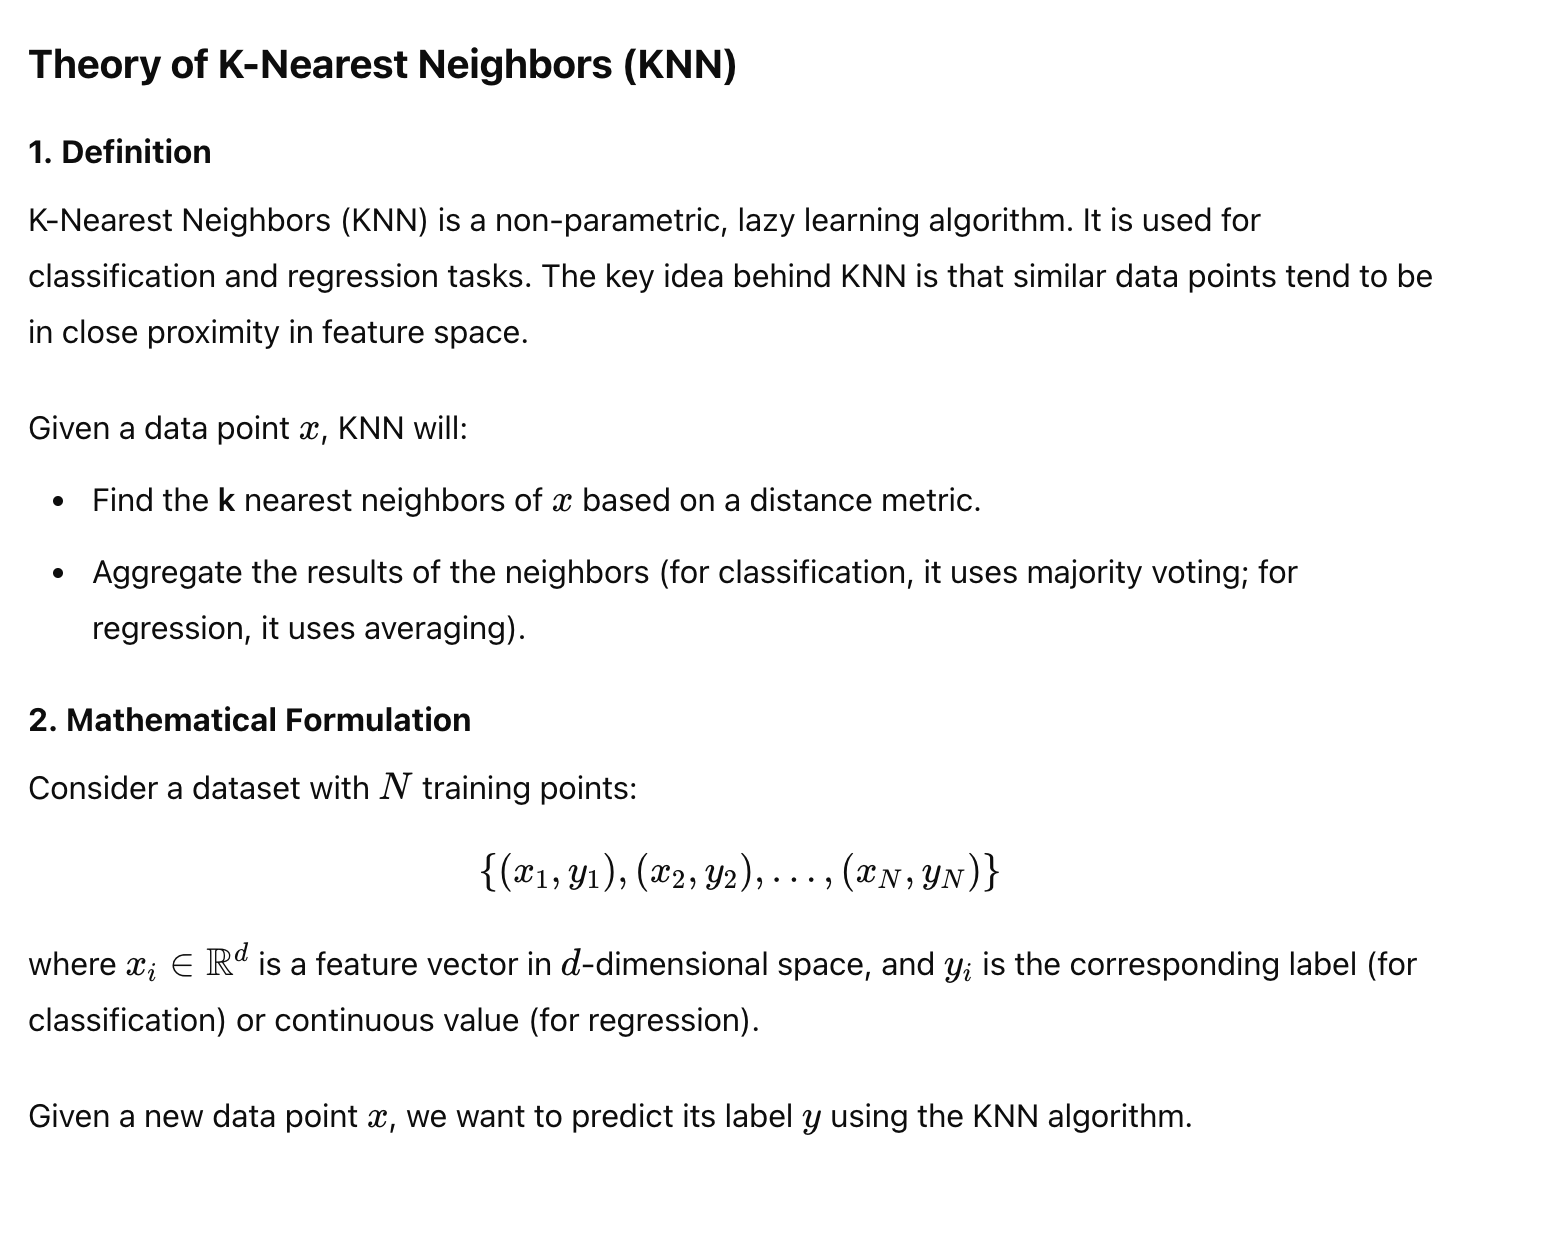

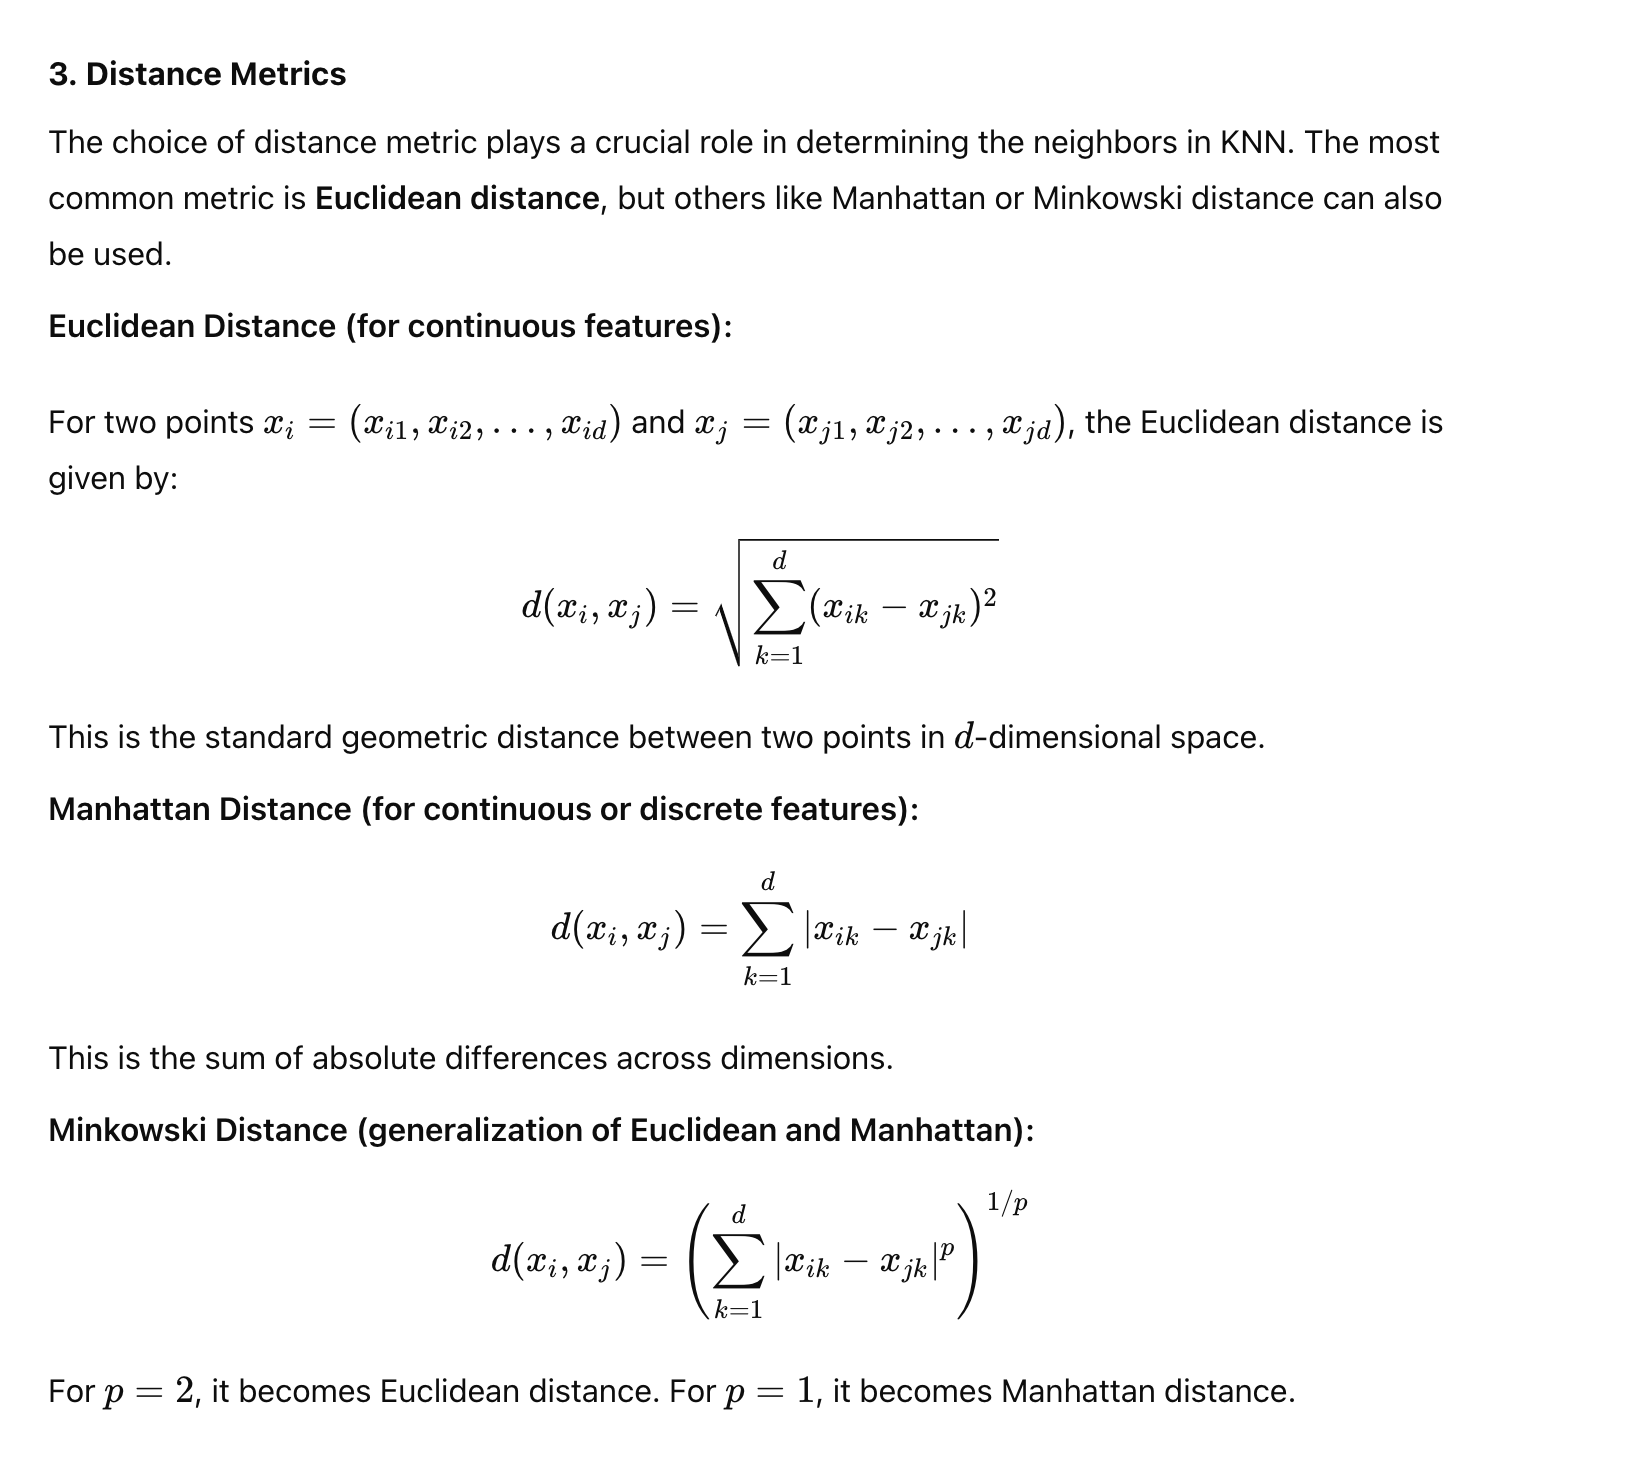

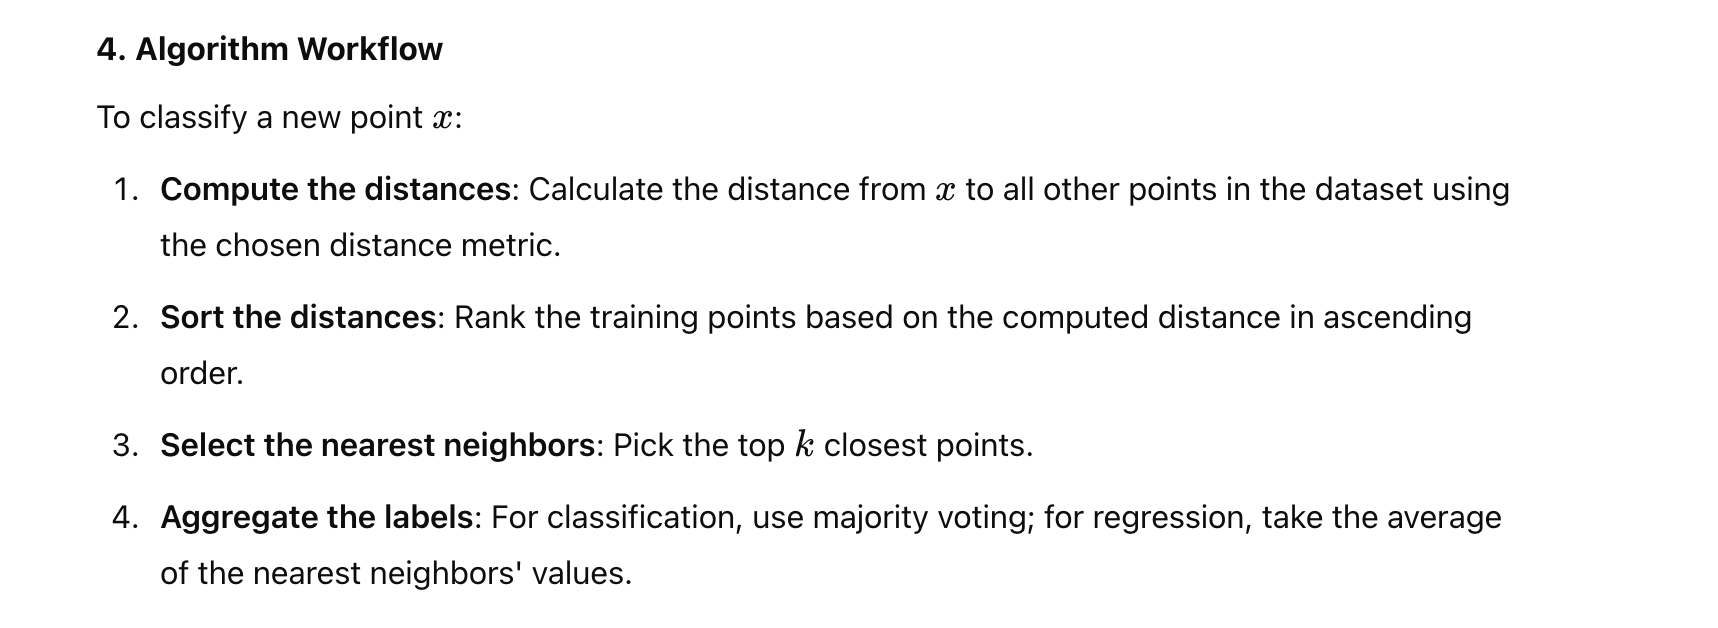

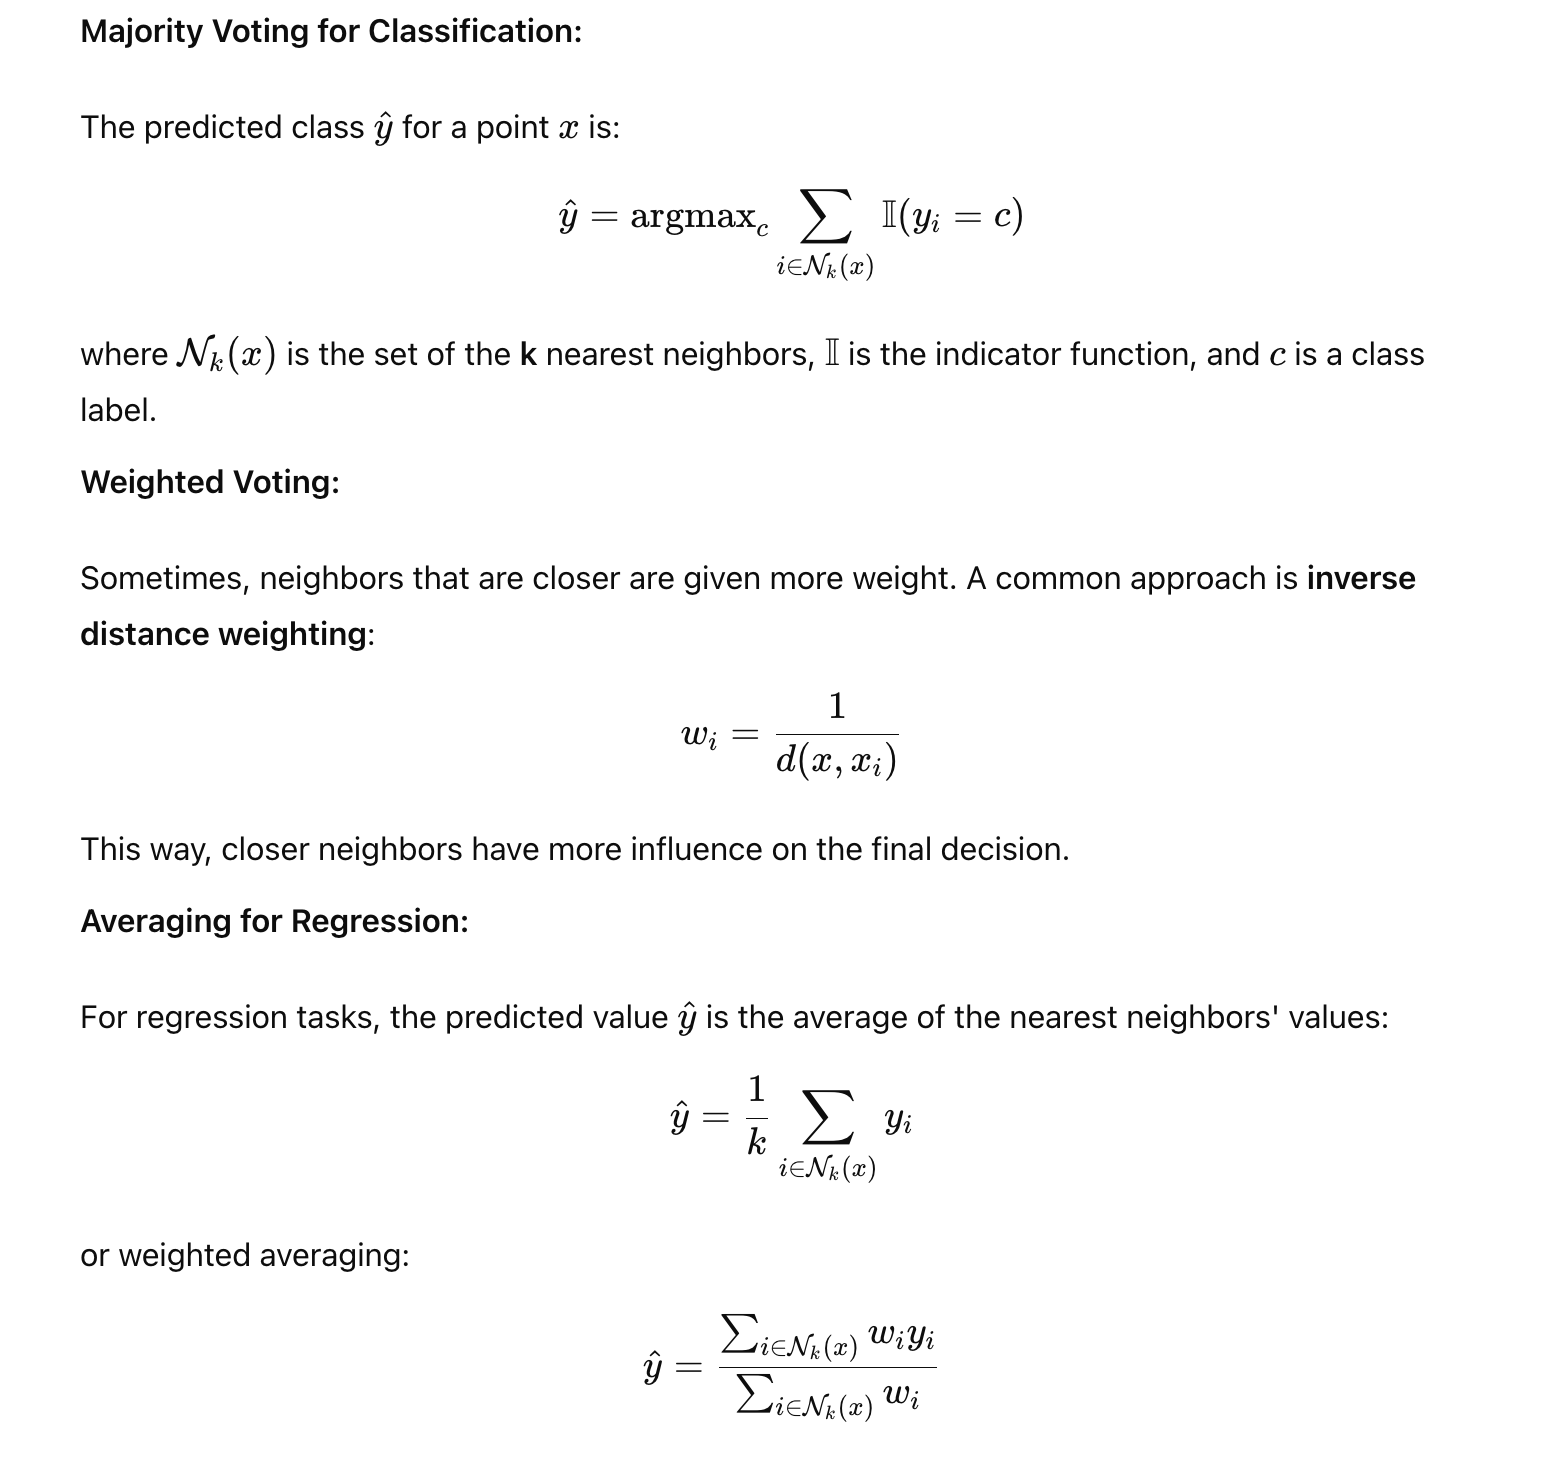

#Importing Libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap


# Defining the Custom  Model

In [105]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Classifier class
class KNN:
    def __init__(self, n_neighbours=5):
        self.k = n_neighbours

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

Counter Function :

```
from collections import Counter

# Example with a list
data = ['apple', 'banana', 'apple', 'orange', 'banana', 'banana']
counter = Counter(data)
print(counter)
# Output: Counter({'banana': 3, 'apple': 2, 'orange': 1})

most_common = counter.most_common(2)  # Get the 2 most common elements
print(most_common)
# Output: [('banana', 3), ('apple', 2)]


```






# Time Complexity Analysis


```
  def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

```





```
# Function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
```



Time Complexity = O(d*n + n*log(n) + k )
                = O (d*n)  ;where d is dimension of data (X) and n is size of training data .  


n log(n) term can be easily removed , How ?

DSA Question : Can we do better than sorting ??  



# Creating a Dataset


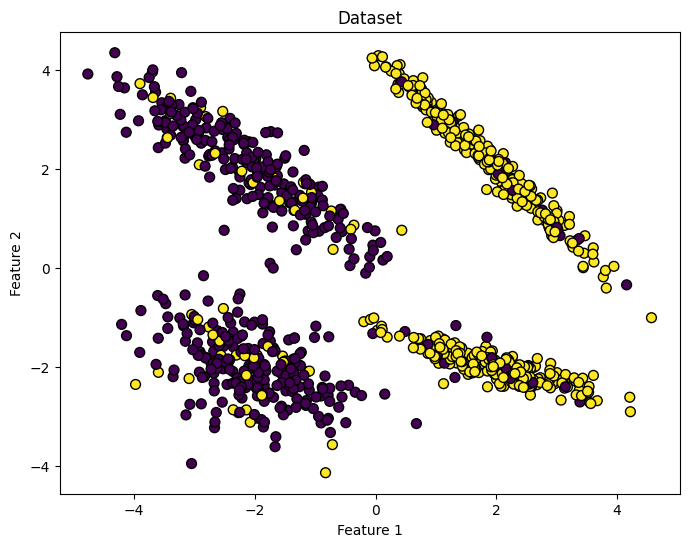

In [108]:
from sklearn.datasets import make_classification
# Generate Balanced Data
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=17)



plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

# Splitting the Data

<ipython-input-109-f4d86dfb12d1>:7: UserWarning:

You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



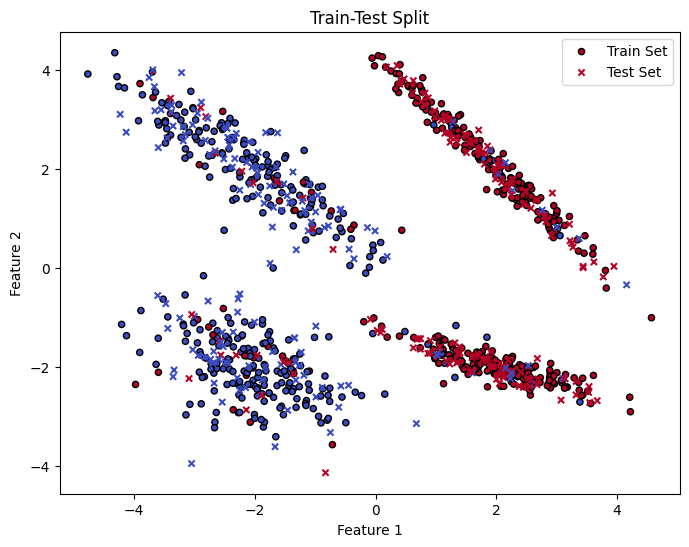

In [109]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize train-test split
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=20, edgecolor='k',marker='o', label='Train Set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=20, edgecolor='k', marker='x', label='Test Set')
plt.title("Train-Test Split")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


#KNN Classifier Training


In [110]:
# Initialize KNN classifier with k=5
knn = KNN(n_neighbours=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


#  Evaluation of the Classifier


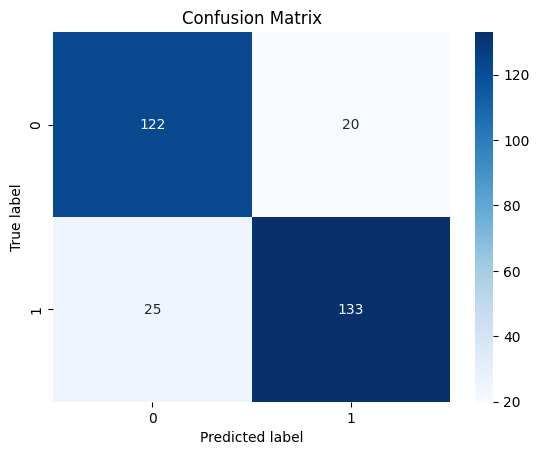

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       142
           1       0.87      0.84      0.86       158

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [111]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


# Experiment 1 : Comparasion With Scikit Learn Function

In [112]:
# Initialize KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

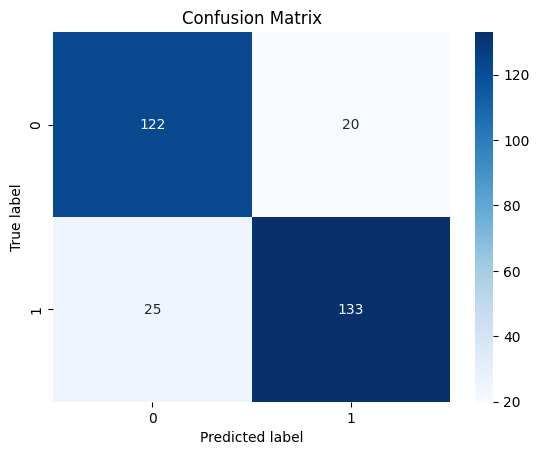

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       142
           1       0.87      0.84      0.86       158

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [113]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


# Experiment No.2 : Visualizing the Decision Boundary


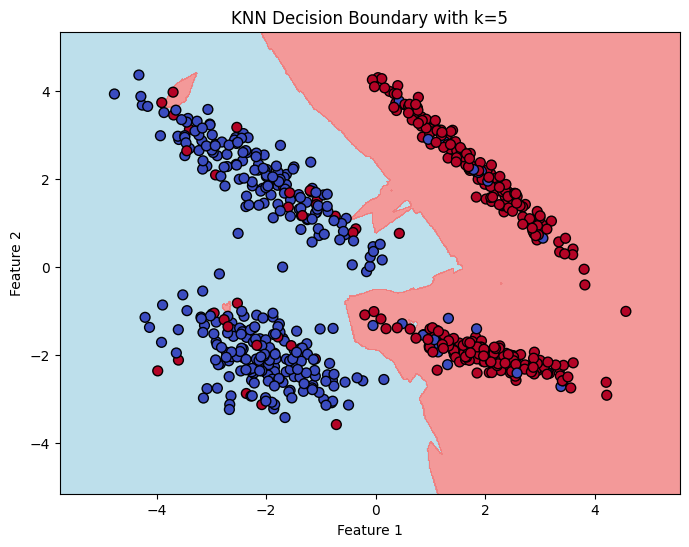

In [114]:
# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary
plt.figure(figsize=(8,6))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue','lightcoral')))

# Plot training and test points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='x', s=50)
plt.title("KNN Decision Boundary with k=5")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Experimet 3 : Varying the Value of k

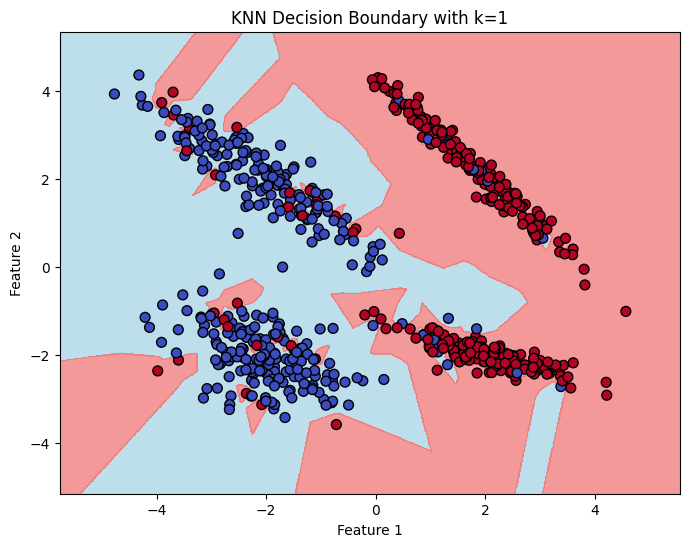

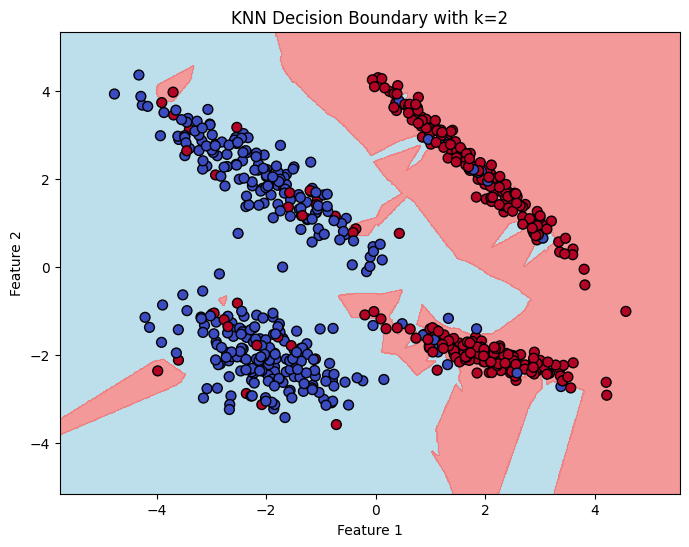

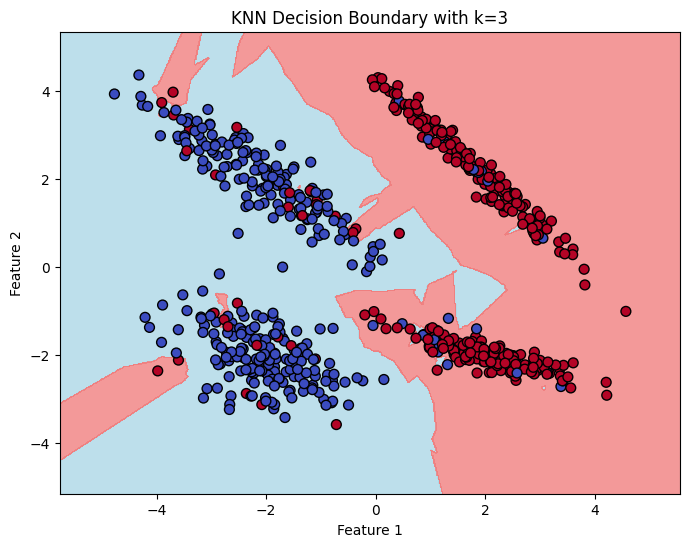

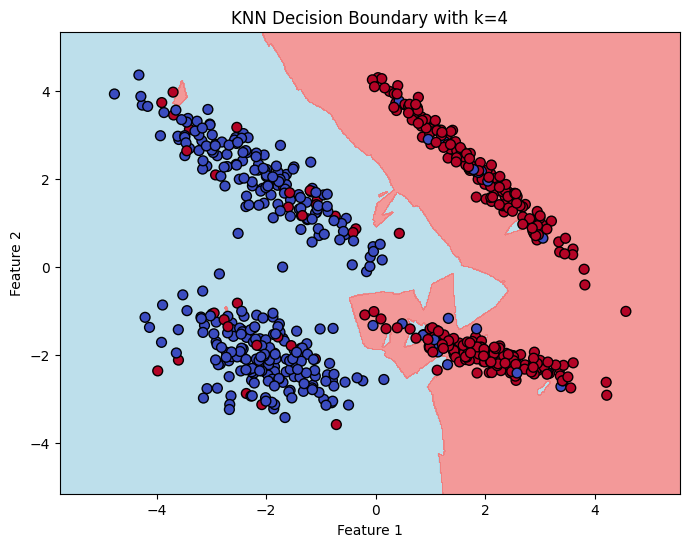

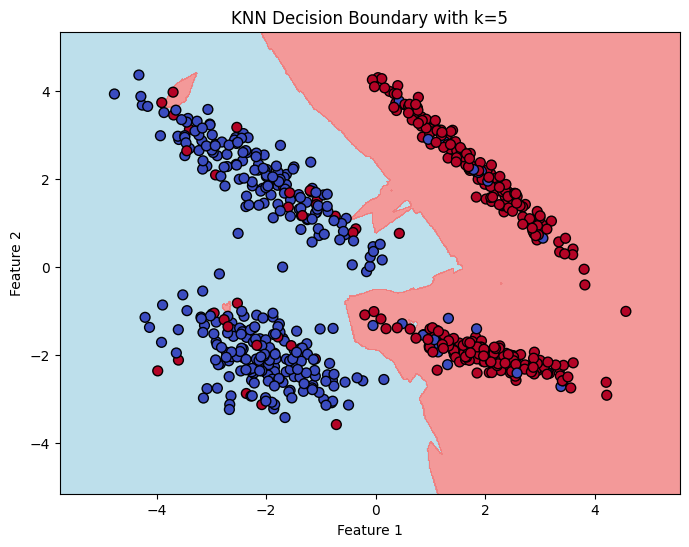

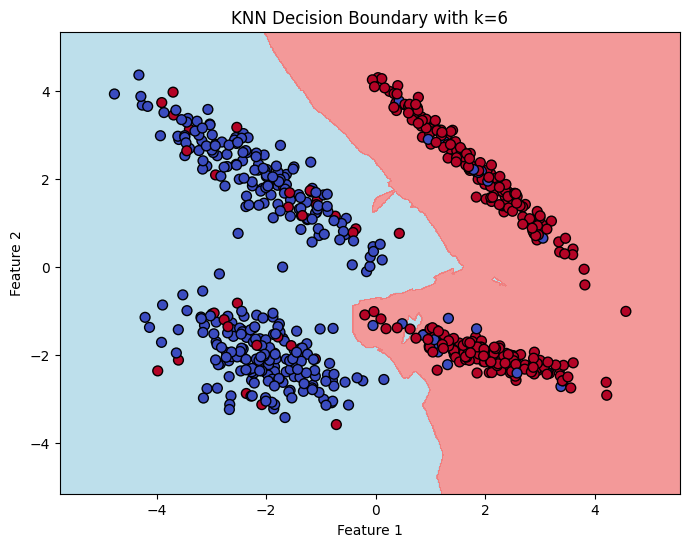

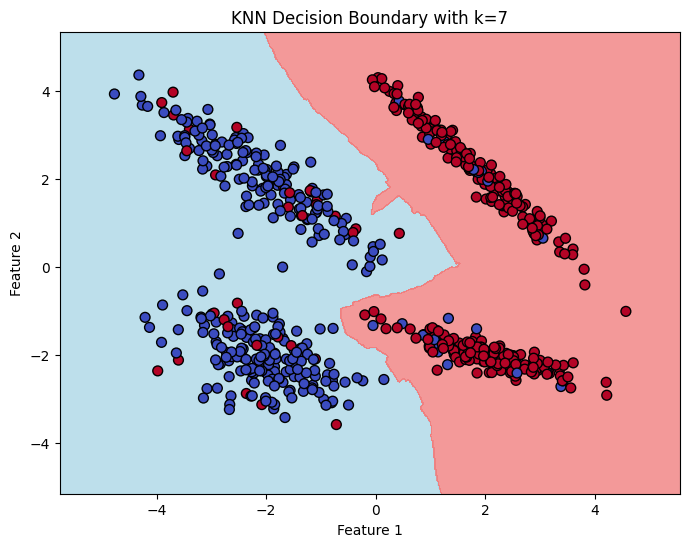

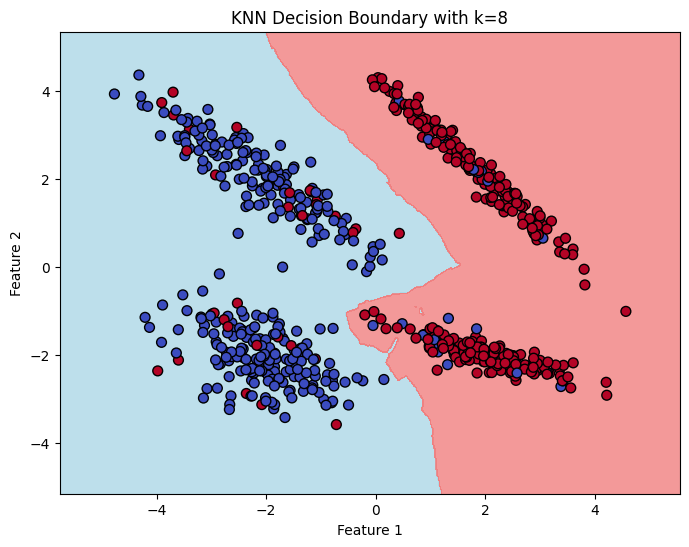

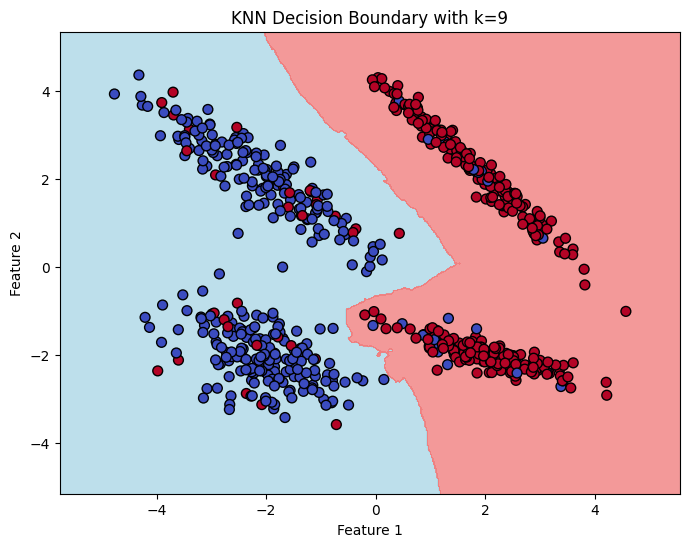

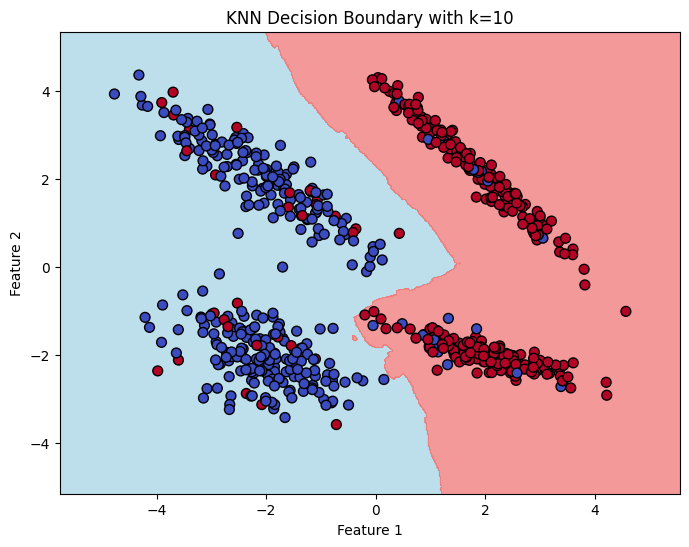

In [115]:
def plot_knn_boundaries(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue','lightcoral')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
    # plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='x', s=50)
    plt.title(f"KNN Decision Boundary with k={k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize decision boundaries for different k values
for k in [1,2,3 ,4,5,6,7,8,9, 10]:
    plot_knn_boundaries(k)


# Experiment 4 : Comparing Distance Metrics

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Manhattan distance function
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Minkowski distance function (generalized form)
def minkowski_distance(x1, x2, p=3):  # p=3 for cubic distance, can be any positive number
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

# Euclidean distance function (already defined earlier)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Classifier class with multiple distance metrics
class KNN:
    def __init__(self, k=5, distance_metric='euclidean', p=3):
        """
        k: number of neighbors to consider
        distance_metric: 'euclidean', 'manhattan', or 'minkowski'
        p: the parameter for the Minkowski distance (ignored if using other metrics)
        """
        self.k = k
        self.distance_metric = distance_metric
        self.p = p

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set based on the chosen metric
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'minkowski':
            distances = [minkowski_distance(x, x_train, self.p) for x_train in self.X_train]
        else:
            raise ValueError("Unsupported distance metric")

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]




# 1) Euclidean Distance

In [117]:
# Euclidean distance
knn_euclidean = KNN(k=5, distance_metric='euclidean')
knn_euclidean.fit(X_train, y_train)
predictions_euclidean = knn_euclidean.predict(X_test)

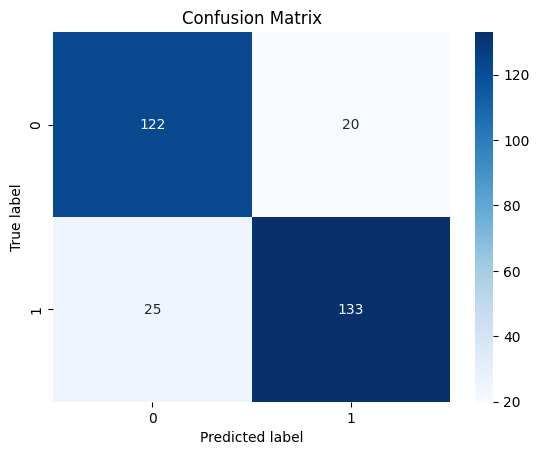

Classification Report for euclidean :
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       142
           1       0.87      0.84      0.86       158

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [118]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions_euclidean)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print("Classification Report for euclidean :\n", classification_report(y_test, predictions_euclidean))


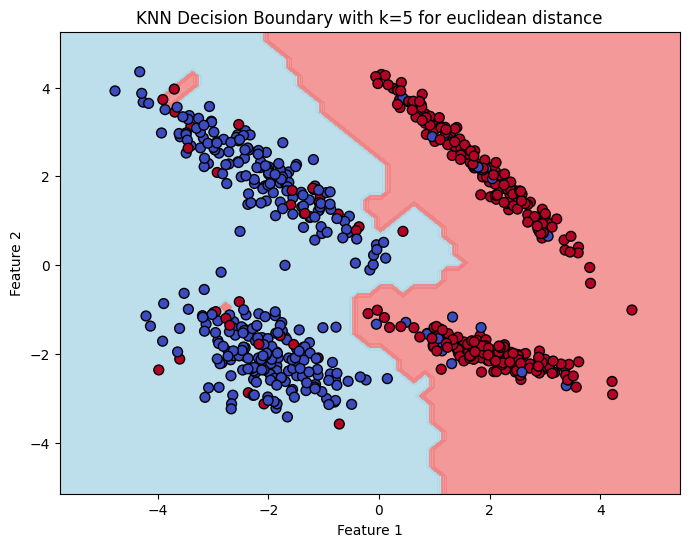

In [119]:
# Create a mesh grid
h = .2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary
plt.figure(figsize=(8,6))
Z = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue','lightcoral')))

# Plot training and test points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='x', s=50)
plt.title("KNN Decision Boundary with k=5 for euclidean distance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 2) Manhattan Distance

In [120]:
# Manhattan distance
knn_manhattan = KNN(k=5, distance_metric='manhattan')
knn_manhattan.fit(X_train, y_train)
predictions_manhattan = knn_manhattan.predict(X_test)

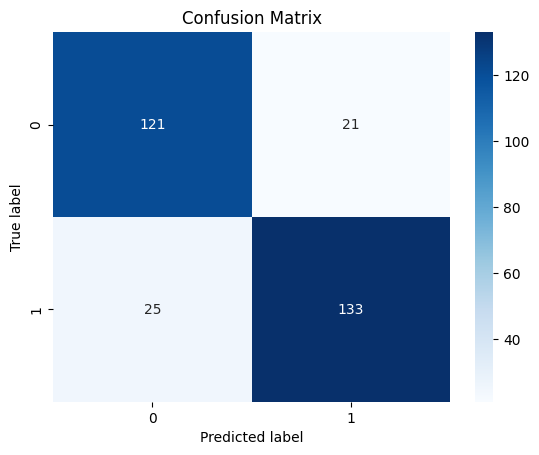

Classification Report for euclidean :
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       142
           1       0.86      0.84      0.85       158

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [121]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions_manhattan)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print("Classification Report for euclidean :\n", classification_report(y_test, predictions_manhattan))


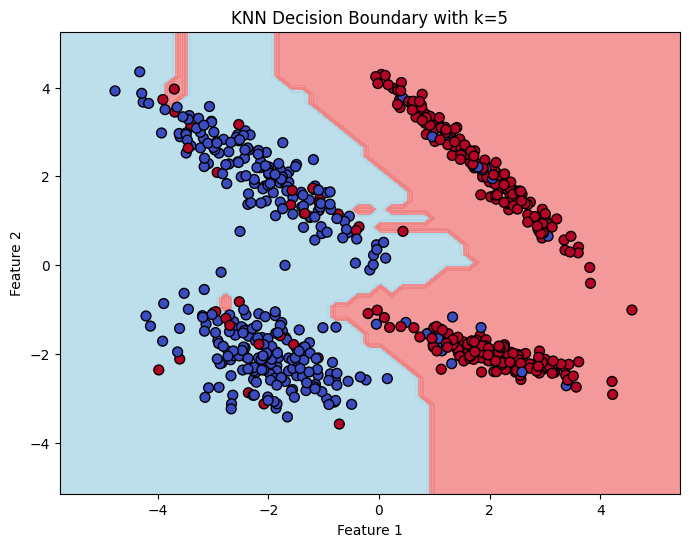

In [122]:
# Create a mesh grid
h = .2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary
plt.figure(figsize=(8,6))
Z = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue','lightcoral')))

# Plot training and test points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='x', s=50)
plt.title("KNN Decision Boundary with k=5")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 3) Minkowski Distance

In [123]:
# Minkowski distance with p=3
knn_minkowski = KNN(k=k, distance_metric='minkowski', p=3)
knn_minkowski.fit(X_train, y_train)
predictions_minkowski = knn_minkowski.predict(X_test)

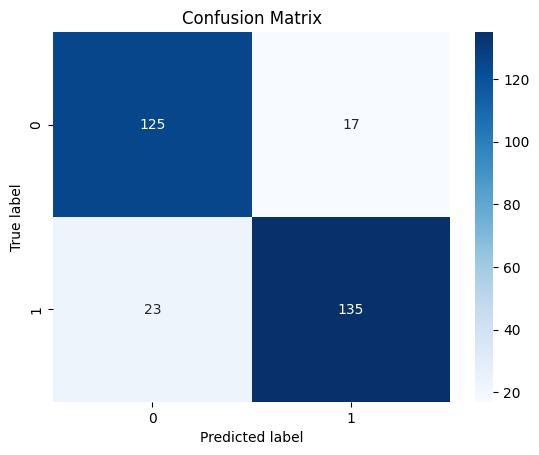

Classification Report for euclidean :
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       142
           1       0.89      0.85      0.87       158

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [124]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions_minkowski)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print("Classification Report for euclidean :\n", classification_report(y_test, predictions_minkowski))


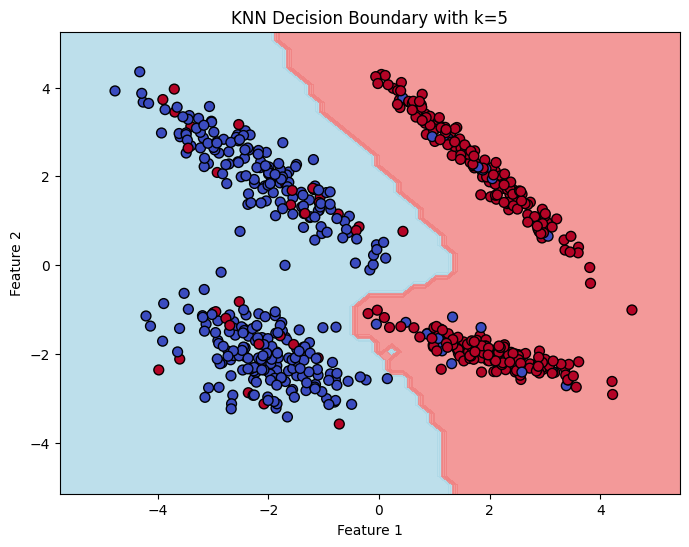

In [125]:
# Create a mesh grid
h = .2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary
plt.figure(figsize=(8,6))
Z = knn_minkowski.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue','lightcoral')))

# Plot training and test points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='x', s=50)
plt.title("KNN Decision Boundary with k=5")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#Experiment 5 : Using KNN for Regression

In [126]:
# KNN Regressor class definition
class KNNRegressor:
    def __init__(self, k=5):
        """
        k: number of neighbors to consider
        distance_metric: 'euclidean', 'manhattan', or 'minkowski'
        p: the parameter for the Minkowski distance (ignored if using other metrics)
        """
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        # Compute distances between x and all examples in the training set

        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]


        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the target values of the k nearest neighbors
        k_nearest_values = [self.y_train[i] for i in k_indices]

        # Return the average of the k nearest neighbors (for regression)
        return np.mean(k_nearest_values)

In [127]:
# Parameters for the line: y = m * X + b
m = 2.5  # Slope
b = 5    # Intercept

# Generate X values
np.random.seed(42)
X = np.linspace(0, 100, 100)

# Generate corresponding y values using the linear equation and adding a bit of noise
noise = np.random.normal(0, 5, X.shape[0])  # Adding some noise to make it more realistic
y = m * X.flatten() + b + noise

from sklearn.model_selection import train_test_split

# Use sklearn's train_test_split for random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN regressor model with Euclidean distance
k = 5
knn_regressor = KNNRegressor(k=k)
knn_regressor.fit(X_train, y_train)

# Predict on the test set
predictions = knn_regressor.predict(X_test)

In [128]:
def mse(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

print("The Mean Square Error is : ", mse(y_test,predictions))

The Mean Square Error is :  31.231734362381868


# Experiment 6 : KNN on real world data ( Iris Dataset)

In [129]:
# Load the dataset
iris_data = pd.read_csv('iris.data.csv')

display(iris_data)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [130]:
#Convert labels to integers for simplicity
# Separate features and labels
X = iris_data.iloc[:, :-1].values  # Features: all columns except the last
y = iris_data.iloc[:, -1].values   # Labels: the last column

unique_labels = np.unique(y)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
y = np.array([label_mapping[label] for label in y])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
print('X_train is :' , X_train )
print('y_train is :' , y_train )

X_train is : [[5.1 3.3 1.7 0.5]
 [5.4 3.9 1.3 0.4]
 [5.6 3.  4.5 1.5]
 [4.8 3.  1.4 0.1]
 [5.  3.5 1.6 0.6]
 [4.9 2.5 4.5 1.7]
 [6.9 3.1 4.9 1.5]
 [5.2 3.4 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [5.5 4.2 1.4 0.2]
 [5.6 2.8 4.9 2. ]
 [6.7 3.1 4.7 1.5]
 [6.3 2.3 4.4 1.3]
 [5.1 3.5 1.4 0.3]
 [4.8 3.4 1.6 0.2]
 [5.8 2.7 3.9 1.2]
 [6.3 2.8 5.1 1.5]
 [6.8 3.2 5.9 2.3]
 [6.8 2.8 4.8 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.8 2.7 4.1 1. ]
 [4.9 3.  1.4 0.2]
 [5.8 2.7 5.1 1.9]
 [6.2 2.2 4.5 1.5]
 [4.7 3.2 1.6 0.2]
 [4.5 2.3 1.3 0.3]
 [4.8 3.  1.4 0.3]
 [5.9 3.  4.2 1.5]
 [6.3 2.7 4.9 1.8]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [4.8 3.4 1.9 0.2]
 [5.6 2.7 4.2 1.3]
 [5.  3.5 1.3 0.3]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.4 2.1]
 [5.3 3.7 1.5 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [4.9 3.1 1.5 0.1]
 [5.7 2.8 4.1 1.3]
 [6.3 2.5 5.  1.9]
 [6.1 2.9 4.7 1.4]
 [6.  3.4 4.5 1.6]
 [6.9 3.2 5.7 2.3]
 [6.5 2.8 4.6 1.5]
 [4.6 3.4 1.4 0.3]
 [6.2 3.4 5.4 2.3]
 [6.  3.  4.8 1.8]
 [7.  3.2 4.7 1.4]

In [132]:
# Initialize KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

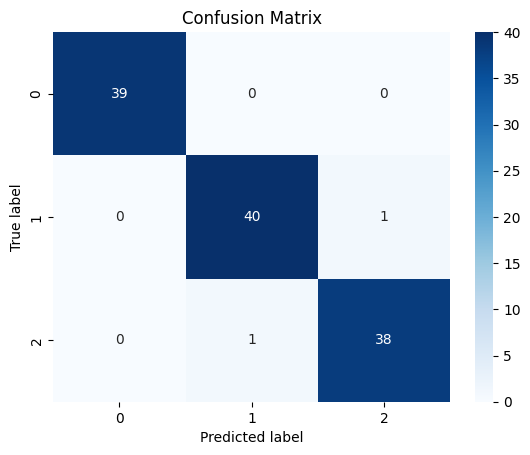

Classification Report for euclidean :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      0.98      0.98        41
           2       0.97      0.97      0.97        39

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



In [133]:
y_pred_train = knn.predict(X_train)


# Confusion Matrix
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print("Classification Report for euclidean :\n", classification_report(y_train, y_pred_train))



# Experiment 7 : Weighted KNN

{ 0 : 0.8 , 1 : 0.4 , 2 : 0.9 }

In [134]:
# Hardcoded logic to find the most common label with weighted voting
def most_common_label_weighted(labels, weights):
    label_weight_sum = {}
    for label, weight in zip(labels, weights):
        if label in label_weight_sum:
            label_weight_sum[label] += weight
        else:
            label_weight_sum[label] = weight

    # Find the label with the maximum weight
    most_common = None
    max_weight = -1
    for label, weight in label_weight_sum.items():
        if weight > max_weight:
            max_weight = weight
            most_common = label

    return most_common

# Weighted KNN Classifier class definition
class WeightedKNNClassifier:
    def __init__(self, k=5, distance_metric='euclidean', p=3):
        self.k = k
        self.distance_metric = distance_metric
        self.p = p

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        # Compute distances between x and all training examples
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'minkowski':
            distances = [minkowski_distance(x, x_train, self.p) for x_train in self.X_train]
        else:
            raise ValueError("Unsupported distance metric")

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels and distances of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        k_nearest_distances = [distances[i] for i in k_indices]

        # Calculate weights (inverse of distances, avoiding division by zero)
        k_weights = [1 / (distance + 1e-9) for distance in k_nearest_distances]  # +1e-9 to avoid division by zero

        # Return the most common class label based on weighted votes
        return most_common_label_weighted(k_nearest_labels, k_weights)

In [136]:
1 / 0

ZeroDivisionError: division by zero

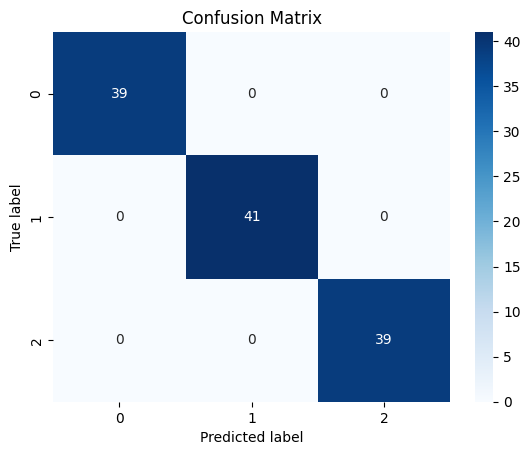

Classification Report for euclidean :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



In [135]:
# Weighted KNN Classifier
knn_classifier = WeightedKNNClassifier(k=5, distance_metric='euclidean')
knn_classifier.fit(X_train, y_train)

# Predict on test set
predictions = knn_classifier.predict(X_train)

# Confusion Matrix
cm = confusion_matrix(y_train, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print("Classification Report for euclidean :\n", classification_report(y_train, predictions))

